In [47]:
from functions import *
import functions as fn

- The spectrum in the arc file 

- The brightest lines could be saturated due to cosmic rays.

- I chose Legendre polynomial of degree 4 to fit because it produced the smallest chi-sq and RMS statistics. 

- Line identification from right to left (Reference: https://arxiv.org/abs/astro-ph/0611363; https://www.caha.es/sanchez/orion/). Assuming an uncertainty in pixel identification of 50-60 (convolution of error due to FWHM and line identificattion/association in a cluster), we expect an error of ~80-100 angstroms in wavelength (back of the envelope using a linear fit in calibration). While there is a line near 450 nm, I do not count it as a bright line beacuse it seems to have some artifacts I cannot quantify. 
    1. The first line is observed at 683.6 nm. Comparing with other observations of the nebula, it is likely that this line is H-alpha (656.3 nm) being the brightest line in the spectrum and proximity to two metal lines. The difference in wavelengths is comparable to the estimated error. 
    2. Next, we have a line at 592.6 nm. Accounting for an uncertainty of about 10 nm, this line is likely HeI (587.6 nm).
    3. Finally, we have a line at 548.3 nm which is most likely, given the similarity in position and structure H-beta, the OIII line (500.2 nm). Note that the offset here is more than 40nm. The numbers don't change with Chebyshev formulation either, which suggests that there is a systematic error in the way line-pixel association was performed. 

 [astropy.io.fits.verify]


SIMPLE  =                    T  / Standard Fits                                 
BITPIX  =                   16  / Bits par pixel                                
NAXIS   =                    2  / Nombre de dimensions                          
NAXIS1  =                 2720  / Axe des X                                     
NAXIS2  =                  512  / Axe des Y                                     
BSCALE  =           1.000000E0  / REAL = TAPE*BSCALE + BZERO                    
BZERO   =           3.276800E4  /                                               
OBJECT  = 'lampecuar'          / Nom de l'objet                                 
OBSERVAT= 'omm     '           / Observatoire                                   
EXPTIME =                 5.00  / Temps d'exposition (sec)                      
DARKTIME=                 5.00  / Temps total ecoule (sec)                      
IMAGETYP= 'comp    '           / Objet, Flat, Bias, etc.                        
DATE-OBS= '2019-10-27T08:19:

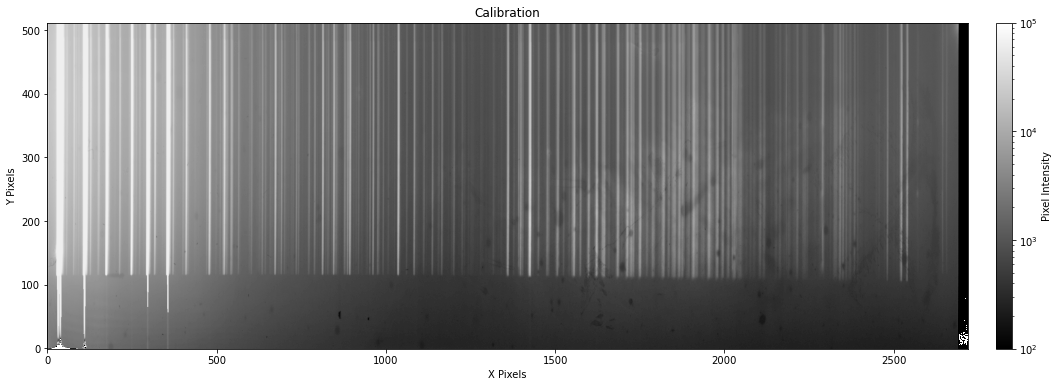

In [48]:
master_bias = np.load('data/master_bias.npy')
arc = fn.read_fits('data/calibration.fits', True)
arc = arc - master_bias
fn.plot_fits(arc, 'Calibration', norm=LogNorm(1e2, 1e5))

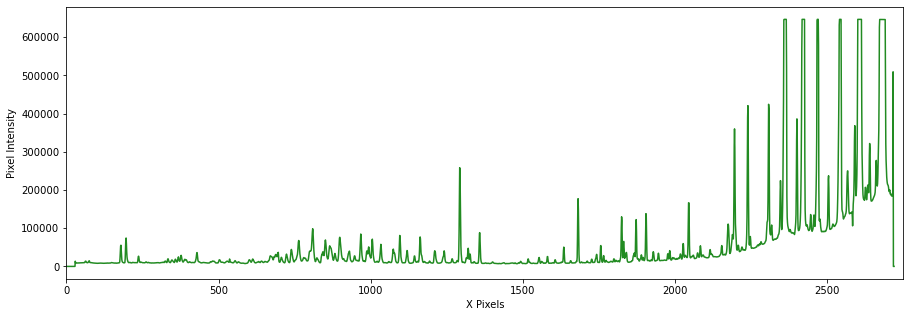

In [49]:
arc_spectrum = fn.spectrum(arc, 300, 10)
arc_spectrum = np.flip(arc_spectrum)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(arc_spectrum, color='forestgreen')    
ax.set_xlabel('X Pixels')
ax.set_ylabel('Pixel Intensity')
#ax.set_yscale('log')
ax.set_xlim(0, 2750)
plt.show()

In [50]:
cuar = fn.read_fits('data/cuar.fits', True)

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                29480 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2004-09-03T22:14:15' / Date FITS file was generated                  
IRAF-TLM= '15:14:15 (03/09/2004)' / Time of last modification                   
OBJECT  = '3250A   '           / Name of the object observed                    
OBSERVAT= 'KPNO              '  /  observatory                                  
OBSERVER= 'Willmarth         '  /  observers                                    
PROPID  = 'T&E               '  /  observing proposal ID                        
EXPTIME =             100.14

In [51]:
spatial_resolution = 1.73  # angstroms per pixel

lambda0 = 3053.5651855469  # angstroms
dlambda = 0.25  # angstroms
ref_pix = 1  # pixel number

wavelengths = np.arange(lambda0, lambda0 + len(cuar) * dlambda, dlambda)

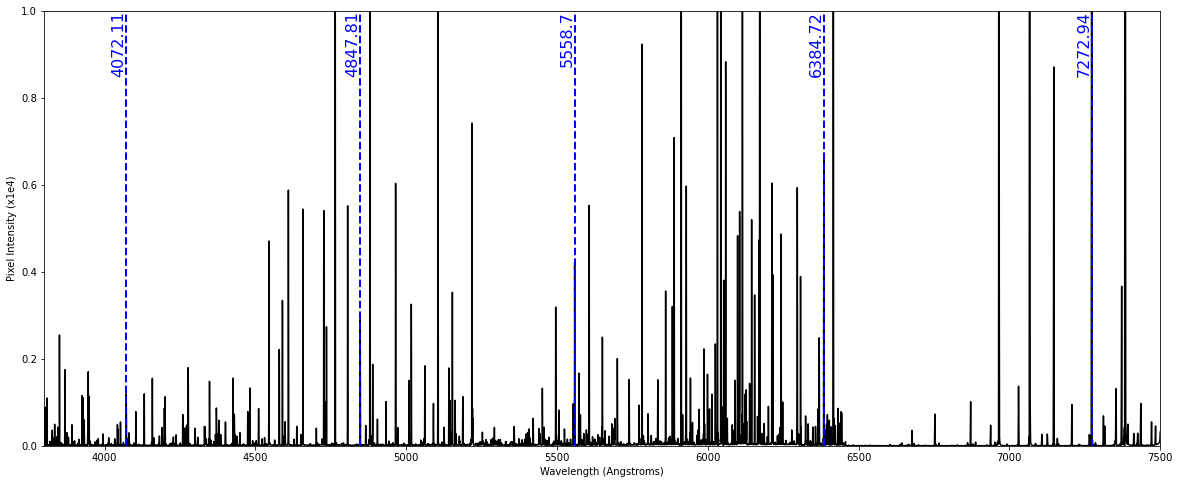

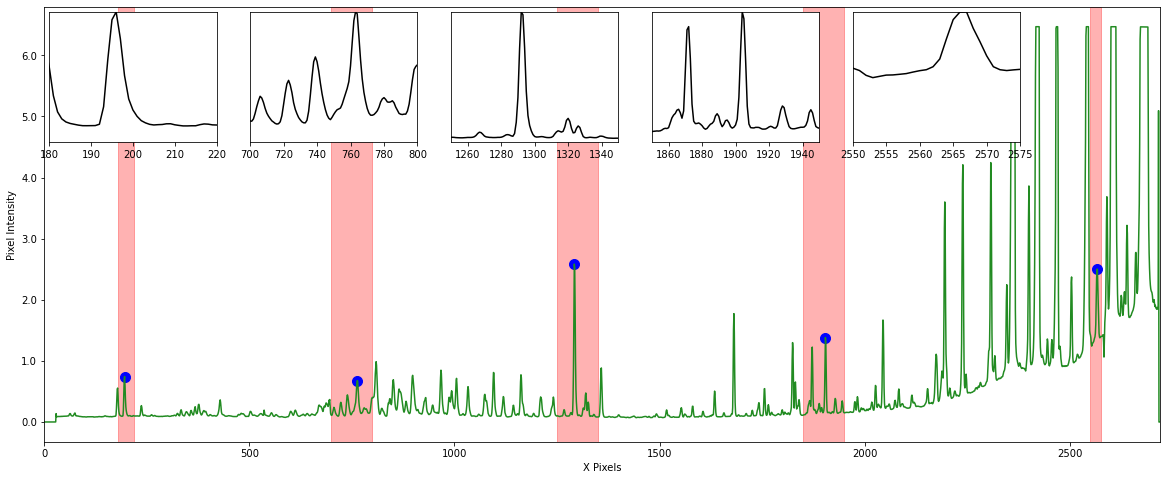

In [52]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(wavelengths, cuar, color='black')    
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Pixel Intensity (x1e4)')
#ax.set_yscale('log')
ax.set_xscale('linear')
ax.set_xlim(3800, 7500)
ax.set_ylim(0, 1e4)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.01f}".format(x / 1e4)))

# Identifying lines in CuAr spectrum
# Reference: https://www.ing.iac.es/astronomy/observing/manuals/ps/tech_notes/tn133.pdf
lines = [4072.11, 4847.81, 5558.70, 6384.72, 7272.94]
for x in lines:
    ax.axvline(x, color='blue', linestyle='--', linewidth=2)
    ax.text(x, ax.get_ylim()[1], f'{x}', rotation=90, verticalalignment='top', horizontalalignment='right', color='blue', fontsize=16)

plt.show()

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(arc_spectrum, color='forestgreen')    
ax.set_xlabel('X Pixels')
ax.set_ylabel('Pixel Intensity')
#ax.set_yscale('log')
ax.set_xlim(0, len(arc_spectrum))
#ax.set_ylim(1e4, 5e5)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}".format(x / 100000)))

# Identifying lines in the calibrration spectrum
ranges = [(180, 220), (700, 800), (1250, 1350), (1850, 1950), (2550, 2575)]
peaks = []

for i, (start, end) in enumerate(ranges):
    ax.axvspan(start, end, color='red', alpha=0.3)
    create_inset(arc_spectrum, ax, start, end, 0.18 * i, 0.0)

    max_value, peak = fn.find_maximum_peak_in_range(arc_spectrum, start, end)
    peaks.append(peak)
    ax.scatter(peak, max_value, color='blue', s=100)

plt.show()

Degree: 2, Chi Squared: 15.756141986571171, RMS: 1.7751699629371365
Degree: 3, Chi Squared: 10.214331112624535, RMS: 1.4292887120959525
Degree: 4, Chi Squared: 8.271806125530277e-24, RMS: 1.2862197421537486e-12
Degree: 5, Chi Squared: 1.9231949241857893e-23, RMS: 1.9612215194545413e-12


/Users/namanjain/opt/anaconda3/lib/python3.9/site-packages/numpy/polynomial/legendre.py:1411: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


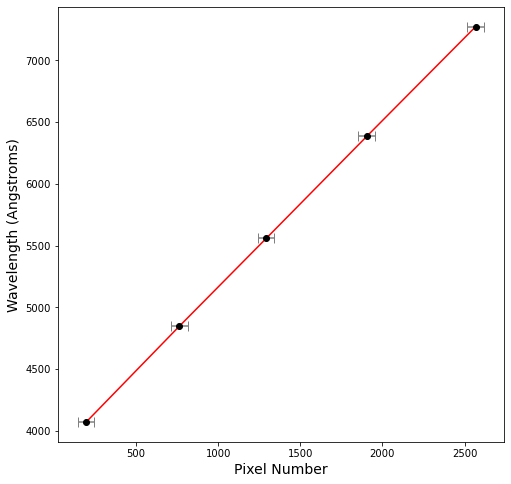

Slope: 1.3492677133236022


In [53]:
for deg in range(2, 6):
    coefficients = np.polynomial.legendre.legfit(peaks, lines, deg)
    fit_line = np.polynomial.legendre.legval(peaks, coefficients)
    chi_squared = np.sum((lines - fit_line) ** 2)
    rms = np.sqrt(np.mean((lines - fit_line) ** 2))
    print(f"Degree: {deg}, Chi Squared: {chi_squared}, RMS: {rms}")

# Perform a 4th degree polynomial fit
# Choosing an error of 50 to account for resolving FWHM of a peak and uncertainty in peak location
plt.figure(figsize=(8, 8))
plt.errorbar(peaks, lines, xerr=50, fmt='o', color='black', ecolor='gray', capsize=5)
coefficients = np.polynomial.legendre.legfit(peaks, lines, 4)
fit_line = np.polynomial.legendre.legval(peaks, coefficients)
plt.plot(peaks, fit_line, color='red')
plt.xlabel('Pixel Number', fontsize=14)
plt.ylabel('Wavelength (Angstroms)', fontsize=14)
plt.show()

# Perform a straight line fit
# Suggests that an error of ~10 pixels in the peak location corresponds to an error of ~15 Angstroms in the wavelength
slope, intercept = np.polyfit(peaks, lines, 1)
print(f"Slope: {slope}")

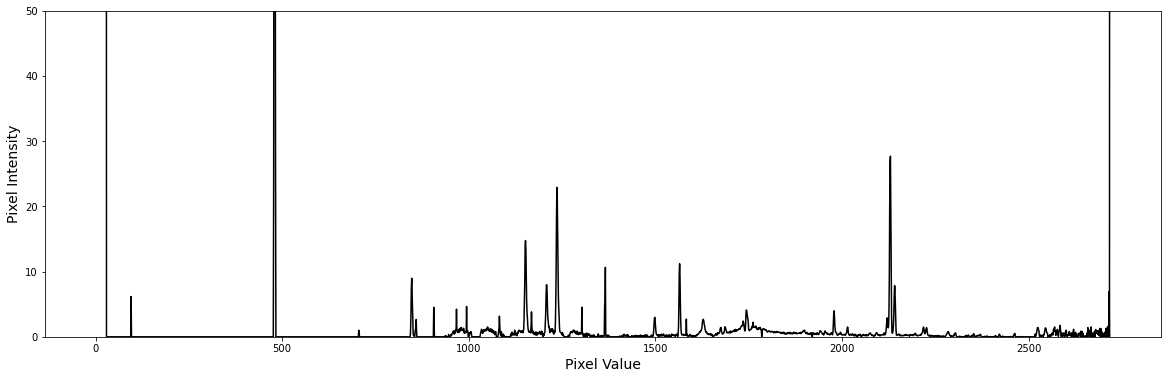

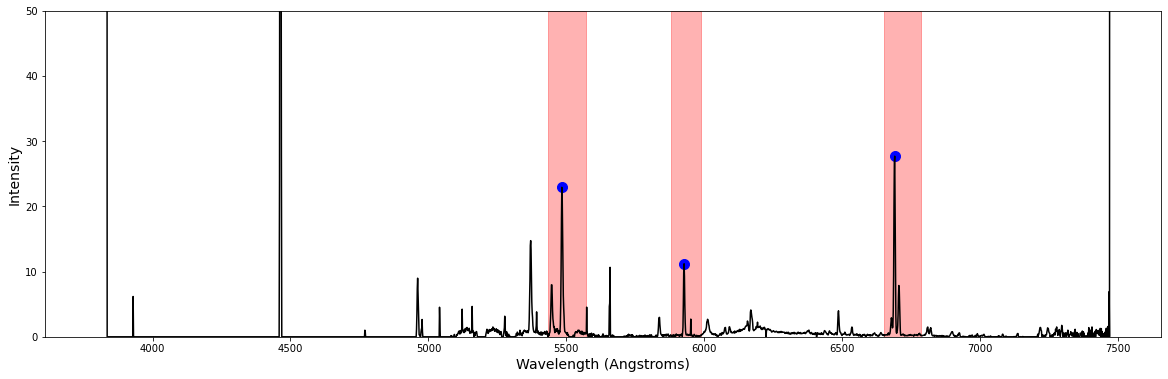

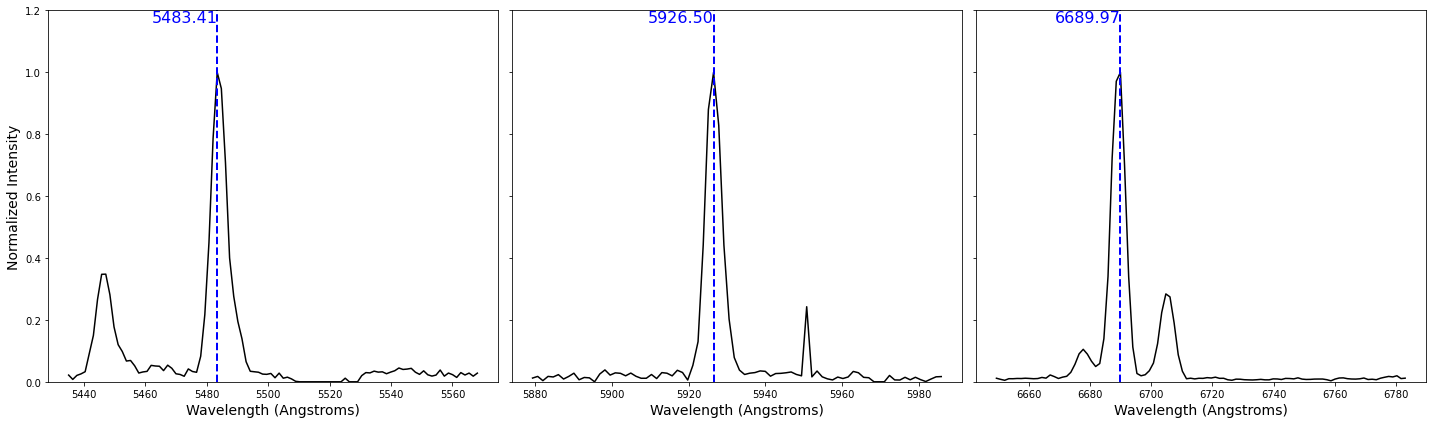

In [54]:
# Import source data and calculate the spectrum
data = np.load('data/data.npy')
data_spectrum = fn.spectrum(data, 120, 30)
data_spectrum[data_spectrum < 0] = 0
data_spectrum = np.flip(data_spectrum)
data_spectrum = data_spectrum

# Plot the spectrum as a function of detector pixels
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data_spectrum, color='black')    
ax.set_xlabel('Pixel Value', fontsize=14)
ax.set_ylabel('Pixel Intensity', fontsize=14)
# ax.set_xscale('log')
ax.set_ylim(0, 50)
plt.show()

# Identify most intense peaks
ranges = [(1200, 1300), (1530, 1610), (2100, 2200)]

# Plot the spectrum as a function of wavelength using the calibration fit
fig, ax = plt.subplots(figsize=(20, 6))
pixels = np.arange(0, len(data_spectrum))
wavelengths = np.polynomial.legendre.legval(pixels, coefficients)

ax.plot(wavelengths, data_spectrum, color='black')    
ax.set_xlabel('Wavelength (Angstroms)', fontsize=14)
ax.set_ylabel('Intensity', fontsize=14)
# ax.set_xscale('log')
ax.set_ylim(0, 50)

# Find the wavelengths of the peaks
peak_wavelengths = []
for i, (start, end) in enumerate(ranges):
    ax.axvspan(
        np.polynomial.legendre.legval(start, coefficients), 
        np.polynomial.legendre.legval(end, coefficients), 
        color='red', 
        alpha=0.3
    )
    max_value, peak = fn.find_maximum_peak_in_range(data_spectrum, start, end)
    peak = np.polynomial.legendre.legval(peak, coefficients)
    peak_wavelengths.append(peak)
    ax.scatter(peak, max_value, color='blue', s=100)

plt.show()

# Plot the peaks individually
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.subplots_adjust(hspace=0., wspace=0.)

for ax, (start, end), w in zip(axs, ranges, peak_wavelengths):
    norm_spectrum = data_spectrum[start:end] / np.max(data_spectrum[start:end])
    ax.plot(
        np.polynomial.legendre.legval(
            np.arange(start, end), 
            coefficients
        ), 
        norm_spectrum, 
        color='black'
    )
    ax.set_xlabel('Wavelength (Angstroms)', fontsize=14)
    if ax == axs[0]:
        ax.set_ylabel('Normalized Intensity', fontsize=14)
    ax.set_ylim(0, 1.2)
    ax.axvline(w, color='blue', linestyle='--', linewidth=2, label=f'{w:.2f}')
    ax.text(w, ax.get_ylim()[1], f'{w:.2f}', fontsize=16, verticalalignment='top', horizontalalignment='right', color='blue')

plt.tight_layout()
plt.show()

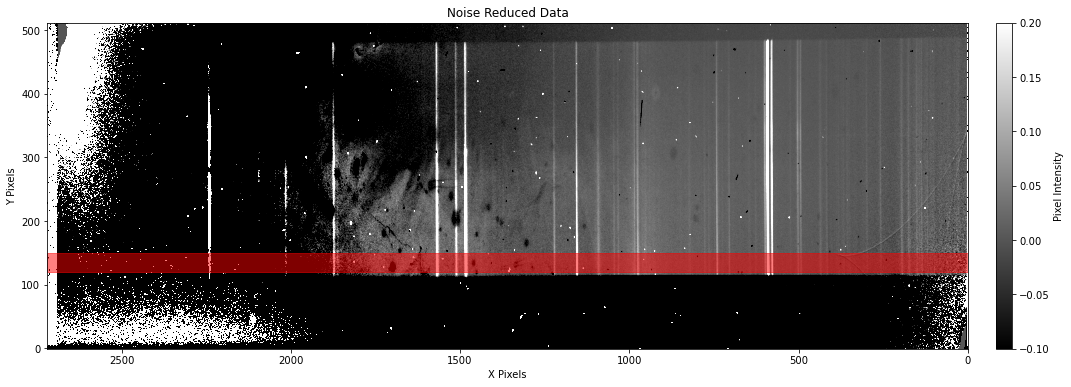

In [55]:
fn.plot_fits(data, 'Noise Reduced Data', Normalize(vmin=-.1, vmax=0.2), flip_xaxis=True)

plt.axhspan(120, 150, color='red', alpha=0.5)
plt.show()